# Advanced Topics for Lecture 10

## The Expected Value and Variance of a Portfolio with $N$ Assets

In the exercise questions, we discussed the expected value and variance of a portfolio with bonds and stocks. In this section, we consider a more general case of portfolios with $N$ assets. Let $R_i$ be a random variable representing the return on the $i$th asset, and $x_i$ be the allocated weight of $i$th asset, with $i=1, 2, ..., N$. The expected value and variance of the portfolio can be written as the following equations:

$$
\begin{cases}
\mathbb{E}\left(\sum\limits_{i=1}^Nx_iR_i\right) = \sum\limits_{i=1}^Nx_i\mathbb{E}(R_i) \\
\text{Var}\left(\sum\limits_{i=1}^Nx_iR_i\right) = \sum\limits_{i=1}^N\sum\limits_{j=1}^N\sigma_{ij}x_ix_j
\end{cases}
$$

where $\sigma_{ij}$ is the value in the $i$th row and $j$th column of the covariance matrix of asset returns. 

We will use the "stocks.csv" dataset to demonstrate the calculation. 

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 10
pd.options.display.max_rows = 8

stocks = pd.read_csv('stocks.csv')
returns = stocks.pct_change().dropna().reset_index(drop=True)
returns

,JPM,XOM,CRM,AMZN,TSLA,...,MCD,NKE,SBUX,T,KO
0,0.004633,0.024363,-0.015541,-0.004564,-0.002316,...,0.007222,-0.005408,-0.000681,0.016550,0.001411
1,-0.006045,-0.003813,0.011092,0.004311,0.001611,...,-0.004377,-0.002322,-0.001534,-0.002894,-0.000705
2,-0.001756,-0.005832,-0.007002,0.008982,0.026378,...,-0.011012,-0.003981,-0.011946,-0.005080,-0.018685
3,-0.004460,-0.009166,-0.009766,0.004619,0.001262,...,0.010288,-0.011867,0.019432,0.006564,0.013472
...,...,...,...,...,...,...,...,...,...,...,...
247,-0.032729,-0.012312,-0.049911,-0.047567,-0.026953,...,-0.021366,-0.043632,-0.038105,-0.011056,-0.024122
248,-0.002442,0.022990,-0.030382,-0.007342,-0.011351,...,-0.005020,-0.003694,0.000714,-0.006149,-0.006021
249,0.000175,-0.038054,-0.003371,-0.008167,-0.024998,...,-0.008488,-0.000185,-0.008440,0.002250,-0.009246
250,-0.005944,-0.007476,-0.022233,-0.015226,-0.007526,...,0.000674,-0.013073,0.007913,-0.015713,-0.007080


In [2]:
stocks.shape

(252, 15)

Here, we will use the sample means and sample covariance of the returns of 15 stocks to approximate their true expected values and covariance. 

In [3]:
means = returns.mean()
means

JPM    -0.001091
XOM     0.002696
CRM    -0.001772
AMZN   -0.000871
          ...   
NKE    -0.001469
SBUX   -0.001028
T      -0.000173
KO      0.000528
Length: 15, dtype: float64

In [4]:
sigma = returns.cov()
sigma

,JPM,XOM,CRM,AMZN,TSLA,...,MCD,NKE,SBUX,T,KO
JPM,0.000299,0.000110,0.000186,0.000215,0.000233,...,0.000098,0.000181,0.000184,0.000098,0.000078
XOM,0.000110,0.000450,0.000082,0.000099,0.000113,...,0.000026,0.000070,0.000045,0.000069,0.000037
CRM,0.000186,0.000082,0.000766,0.000515,0.000582,...,0.000115,0.000367,0.000324,0.000090,0.000077
AMZN,0.000215,0.000099,0.000515,0.000777,0.000604,...,0.000130,0.000381,0.000324,0.000082,0.000081
...,...,...,...,...,...,...,...,...,...,...,...
NKE,0.000181,0.000070,0.000367,0.000381,0.000429,...,0.000110,0.000477,0.000290,0.000080,0.000083
SBUX,0.000184,0.000045,0.000324,0.000324,0.000399,...,0.000141,0.000290,0.000435,0.000086,0.000085
T,0.000098,0.000069,0.000090,0.000082,0.000061,...,0.000065,0.000080,0.000086,0.000275,0.000077
KO,0.000078,0.000037,0.000077,0.000081,0.000059,...,0.000088,0.000083,0.000085,0.000077,0.000140


Now we consider a portfolio with equal weight of each stock, i.e. $x_i=1/N$.

In [5]:
N = 15

x = np.ones(N) / N
print(x)

[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667]


The expected value (`mean_p`) and variance (`var_p`) can be calculated by the following code.

In [6]:
mean_p = (means.values * x).sum()
var_p = (x.reshape((N, 1)) * sigma.values * x).sum()

print(f'Expected return: {mean_p}')
print(f'Variance of return: {var_p}')

Expected return: -0.0005664798854834127
Variance of return: 0.00023517318687245252


## Mean-Variance Optimization of Portfolios

In the section above, we discussed how to calculate the mean and variance of the return of a portfolio. In this section, we will introduce how to optimize the weights of a portfolio according to the mean-variance analysis, proposed by Harry Markowitz (1952). This work earned him the Nobel Prize in Economics about four decades later. The optimization problem is formulated as follows,

$$
\begin{align}
\min~ &\sum\limits_{i=1}^N\sum\limits_{j=1}^N\sigma_{ij}x_ix_j \\
\text{subject to}~&\sum\limits_{i=1}^Nx_i\mathbb{E}(R_i) \geq \tau \\
&\sum\limits_{i=1}^Nx_i = 1 \\
&x_i \geq 0, i=1, 2, ..., N.
\end{align}
$$

The optimization model suggests that we are seeking the smallest risk, in terms of the variance, while the expected return guaranteed to be no lower than a target value $\tau$, selected by the investor.

This model is a quadratic programming problem, and we can also use the RSOME package, introduced in the Advanced Topics for Lecture 9, to solve it. Here, we need to install a free solver ECOS for solving the quadratic programming problem.

In [7]:
!pip install ecos

  Using cached ecos-2.0.10-cp39-cp39-macosx_10_9_universal2.whl


Now we select a return target $\tau=0.0005$, the optimization model can be solved by the following code.

In [8]:
from rsome import ro                       # Import ro models
from rsome import eco_solver as eco        # Import the ECOS solver

N = 15
tau = 0.0005                               # Target return

model = ro.Model()                         # Create a model

x = model.dvar(N)                          # Define decision variables

model.min(x.quad(sigma.values))            # Define objective function
model.st((means.values * x).sum() >= tau)  # The 1st constraint
model.st(x.sum() == 1)                     # The 2nd constraint
model.st(x >= 0)                           # The 3rd constraint

model.solve(eco)                           # Solve the model by ECOS solver

Being solved by ECOS...
Solution status: Optimal solution found
Running time: 0.0016s


The optimal weights of the selected assets are displayed below.

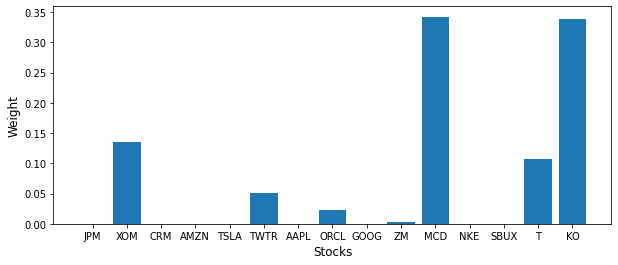

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.bar(means.index, x.get())
plt.ylabel('Weight', fontsize=12)
plt.xlabel('Stocks', fontsize=12)
plt.show()

You may choose different values for the target $\tau$ to explore how it influence the decision on portfolio selections.